<a href="https://colab.research.google.com/github/woocloud/chingyi-ml/blob/main/ex02_activation_function_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls

In [ ]:
import numpy as np
np.random.seed(1337)

my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

y_train = my_data[:,200]
y_train = y_train.astype('int')

import tensorflow
Y_train = tensorflow.keras.utils.to_categorical(y_train,5)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

# set the size of mini-batch and number of epochs
batch_size = 16
epochs = 30

''' Import keras to build a DL model '''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Step 1: 修改 model_sp 的 activation functions
1. 前面兩層 Dense layers 指定使用 'relu' activation function
2. 最後一層使用 'softmax' activation function

In [ ]:
# Use other activation function
model_sp = Sequential()
model_sp.add(Dense(128, input_dim=200))
model_sp.add(Activation('relu'))
model_sp.add(Dense(256))
model_sp.add(Activation('relu'))
model_sp.add(Dense(5))
model_sp.add(Activation('softmax'))

In [ ]:
# lr set to 0.01
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01,momentum=0.0,nesterov=False)

model_sp.compile(loss= 'categorical_crossentropy',
         optimizer=sgd,
         metrics=['accuracy'])

history_sp = model_sp.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              shuffle=True,
              validation_split=0.1)

loss_sp = history_sp.history.get('loss')
acc_sp = history_sp.history.get('accuracy')

### standard model for comparison

In [ ]:
model_bm = Sequential()
model_bm.add(Dense(128, input_dim=200))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(256))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(5))
model_bm.add(Activation('softmax'))

from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01,momentum=0.0,nesterov=False)

model_bm.compile(loss='categorical_crossentropy',
         optimizer=sgd,
         metrics=['accuracy'])
history_bm = model_bm.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              shuffle=True,
              validation_split=0.1)
loss_bm	= history_bm.history.get('loss')
acc_bm 	= history_bm.history.get('accuracy')

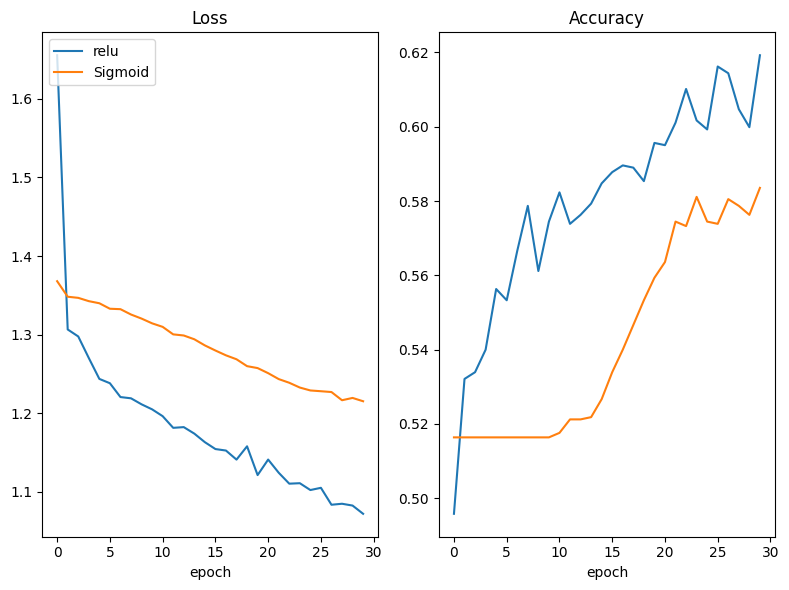

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_sp)),loss_sp,label='relu')
plt.plot(range(len(loss_bm)),loss_bm,label='Sigmoid')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_sp)),acc_sp,label='relu')
plt.plot(range(len(acc_bm)),acc_bm,label='Sigmoid')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.tight_layout()


### Questions
1. Is learning_rate = 0.01 good when using 'relu' as the activation function?
2. How about set learning_rate at 0.001?